In [1]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from numpy import genfromtxt
from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import numpy as np



In [2]:
std_scaler = StandardScaler()
minMaxScaler = MinMaxScaler()


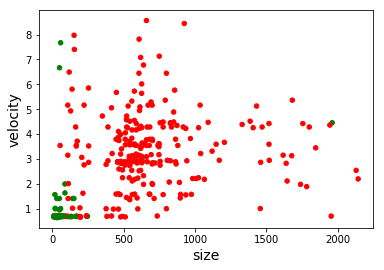

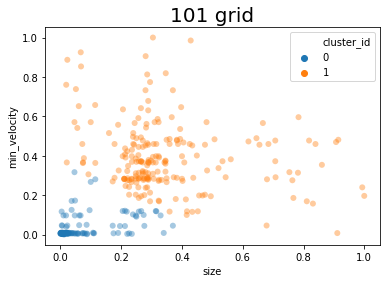

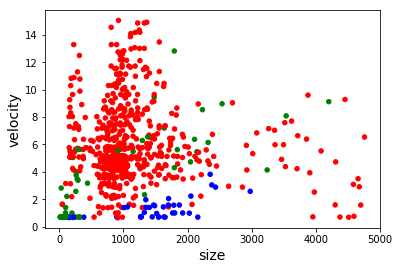

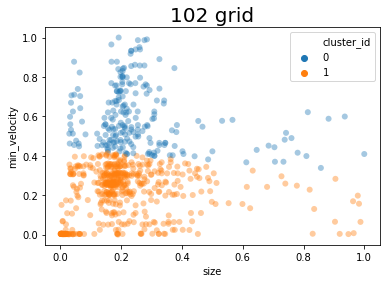

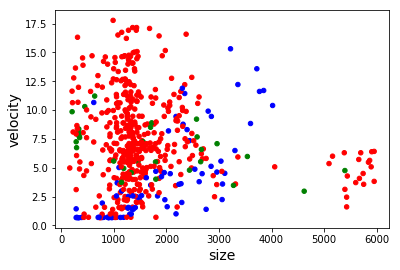

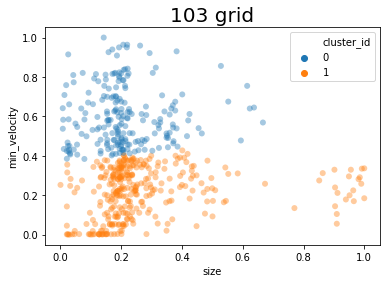

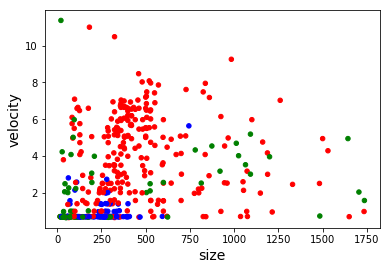

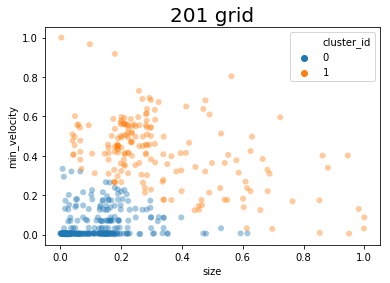

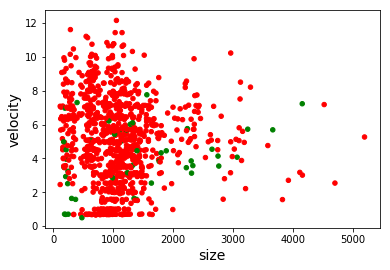

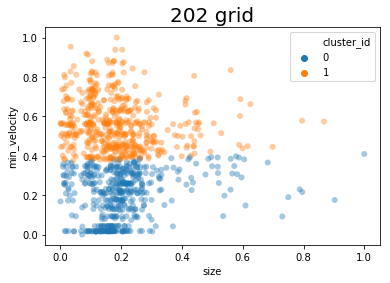

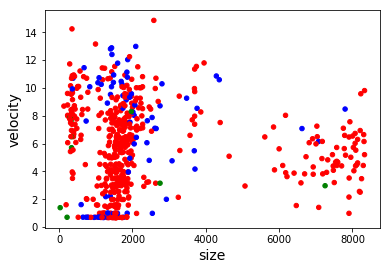

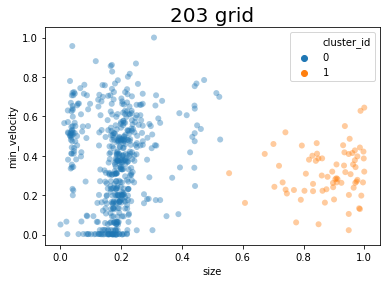

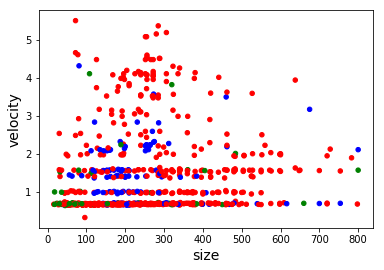

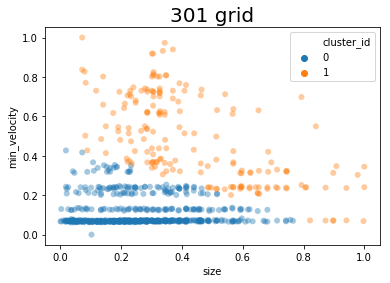

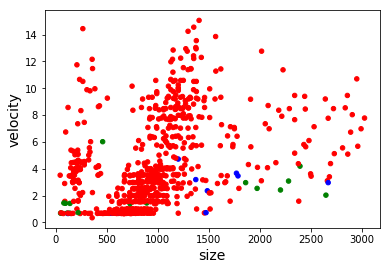

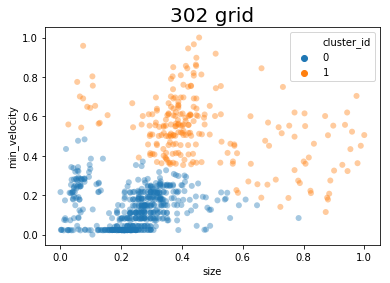

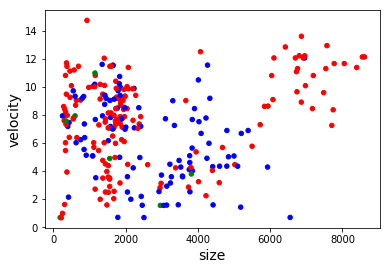

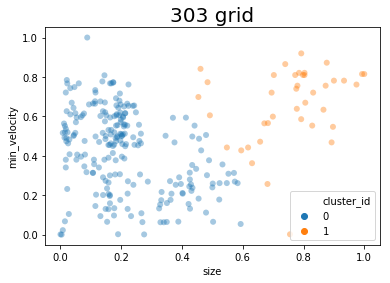

In [56]:
data = pd.read_csv('./paper_source/static_grid/min_4801.txt',names=['grid_id','object_id','object_type','size','min_velocity','avg_velocity', 'max_velocity','x','y'])
# all_grids = [100,101,102,103,104,105,106,107,108,109,200,201,202,203,204,205,206,207,208,209,300,301,302,303,304,305,306,307,308,309,400,401,402,403,404,405,406,407,408,409,500,501,502,503,504,505,506,507,508,509,600,601,602,603,604,605,606,607,608,609,700,701,702,703,704,705,706,707,708,709,800,801,802,803,804,805,806,807,808,809,900,901,902,903,904,905,906,907,908,909,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009]
all_areas = [101,102,103,201,202,203,301,302,303]
for grid_id in all_areas:

    target_grid_id = grid_id

    df = pd.DataFrame(data)
    df = df[df.grid_id ==target_grid_id]

    df['color'] = np.where(df.object_type == 20, 'red', 
                             np.where(df.object_type ==100, 
                             'green', 
                             'blue'))

    df.plot(kind='scatter',
              x='size', 
              y='min_velocity', 
              s=20, # marker size
              c=df['color']) # marker color by group
    # plt.title('Scatter Plot of iris by pandas', fontsize=20)
    plt.xlabel('size', fontsize=14)
    plt.ylabel('velocity', fontsize=14)
    plt.show()
    # sns.lmplot('size','avg_velocity', data=df, fit_reg=False, scatter_kws={"s": 10}, hue='object_type')


    # min Max  normalize
    df3 = df[['size','min_velocity']]
    fitted2 = minMaxScaler.fit(df3)
    #print(fitted2.mean_)
    ## 출력 결과
    output2 = minMaxScaler.transform(df3)
    output2 = pd.DataFrame(output2, columns=df3.columns, index=list(df3.index.values))
    output2.head(5)

    kmeans_normal2 = KMeans(n_clusters=2).fit(output2)
    kmeans_normal2.cluster_centers_
    # 데이터 중심에 클러스트


    kmeans_normal2.labels_

    output2['cluster_id'] = kmeans_normal2.labels_
    df['cluster_id'] = output2['cluster_id']
    
    if (target_grid_id == 101):
        df.to_csv("./4801_cluster_result2.csv", mode='a', index=False)
    else:
        df.to_csv("./4801_cluster_result2.csv", mode='a', index=False,header=False)        
    ax2 = sns.scatterplot(x='size', 
                         y='min_velocity', 
                         alpha=0.4,
                         hue="cluster_id",
                         edgecolor = 'none',
                         data=output2)
    plt.title('{} grid'.format(target_grid_id), fontsize=20)
    plt.show()
#     elbow(df3)




In [24]:
def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++', random_state = 0)
        km.fit(X)
        sse.append(km.inertia_)
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('cluster count')
    plt.ylabel('SSE')
    plt.show()
    


In [32]:
# output2
df

,grid_id,object_id,object_type,size,min_velocity,avg_velocity,max_velocity,x,y,color,cluster_id
10682,707,65,20,8970,6.059577,7.785547,9.511518,228,188,red,1
10683,707,172,20,1400,7.020918,7.691568,8.362218,227,168,red,0
10684,707,194,20,1845,8.081220,8.081220,8.081220,220,169,red,0
10685,707,203,20,390,6.492637,7.755561,9.018485,230,178,red,0
10686,707,208,20,1088,8.023907,8.193063,8.362218,225,169,red,0
10687,707,213,20,325,9.678866,9.678866,9.678866,222,172,red,0
10688,707,229,20,2418,7.873479,11.364564,14.855650,242,169,red,0
10689,707,234,20,1755,7.486018,8.197230,9.541577,247,173,red,0
10690,707,239,20,312,7.802558,9.013750,10.224943,249,174,red,0
10691,707,243,20,1800,7.539111,9.461451,11.383791,230,181,red,0


In [ ]:
def clustering(df, grid):
    data = pd.read_csv('./paper_source/static_grid/min_japan4road_15min_406.txt',names=['object_id','object_type','size','min_velocity','avg_velocity', 'max_velocity','x','y'])
    # road_user_mean_transactions.txt
    df = pd.DataFrame(data)